### 1. Setup & Loading Dataset

In [50]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")

# Load file dataset
try:

    df = pd.read_csv('datakelulusanmahasiswa.xlsx - Sheet1.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File CSV tidak ditemukan. Pastikan nama file sudah benar dan terupload.")

    exit()

print("\n--- 5 Baris Data Awal ---")
print(df.head())


print("\n--- Deskripsi Kolom Fitur dan Tipe Data ---")
df.info()

print("\n--- Laporan Missing Values Awal ---")
print(df.isnull().sum())




Dataset berhasil dimuat.

--- 5 Baris Data Awal ---
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   

   IPK  STATUS KELULUSAN  
0  3.07        TERLAMBAT  
1  3.17        TERLAMBAT  
2  3.54

### 2. Exploratory Data Analys (EDA)


--- Statistik Deskriptif ---
       count       mean       std    min      25%    50%     75%    max
UMUR   379.0  25.955145  3.397103  22.00  24.0000  25.00  27.000  50.00
IPS 1  379.0   2.854116  0.412658   0.33   2.6000   2.86   3.100   3.79
IPS 2  379.0   2.812322  0.473725   0.50   2.5500   2.85   3.105   3.96
IPS 3  379.0   2.900950  0.589364   0.16   2.5500   2.98   3.325   3.96
IPS 4  379.0   2.782137  0.648495   0.00   2.4600   2.86   3.200   3.91
IPS 5  379.0   2.782348  0.593472   0.20   2.4800   2.85   3.205   3.88
IPS 6  379.0   2.877256  0.634412   0.00   2.5900   3.00   3.315   4.00
IPS 7  379.0   2.531240  0.757205   0.00   2.1500   2.61   3.110   3.91
IPS 8  372.0   1.271828  1.400914   0.00   0.0000   0.75   2.750   4.00
IPK    376.0   2.933085  0.460279   0.87   2.7475   3.01   3.220   3.85


/tmp/ipython-input-1028009305.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df, palette='viridis')


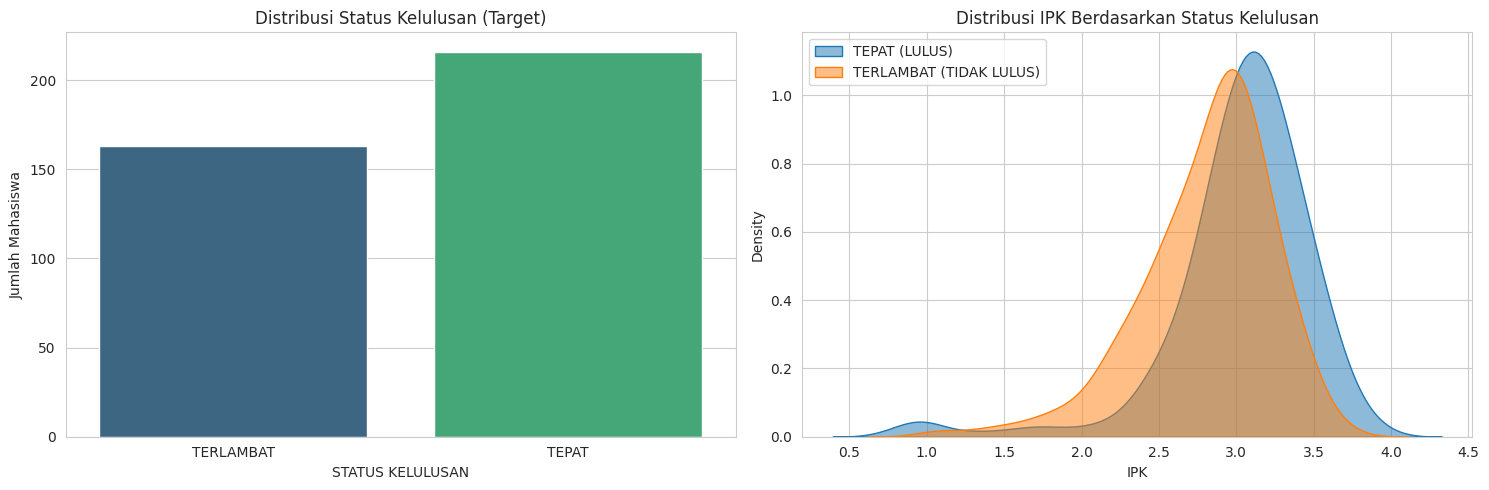


--- Jawaban Pertanyaan EDA ---
1. Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?
   - Ya, berdasarkan visualisasi KDE Plot, terlihat bahwa IPK rata-rata untuk mahasiswa 'TEPAT' (Lulus) cenderung lebih tinggi dan distribusinya lebih sempit (variansi kecil), sementara distribusi 'TERLAMBAT' (Belum Lulus) sedikit lebih menyebar dan puncaknya bergeser ke kiri (IPK lebih rendah).

2. Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?
   - IPK dan rangkaian nilai IPS (IPS 1-8) tampak sangat dominan karena secara langsung mengukur performa akademik. Selain itu, fitur numerik seperti UMUR mungkin juga berpengaruh; mahasiswa yang lebih tua mungkin memiliki tanggung jawab lain (misalnya STATUS MAHASISWA BEKERJA) yang memengaruhi ketepatan kelulusan.


In [51]:
# 1. Statistik deskriptif (mean, std, min, max)
print("\n--- Statistik Deskriptif ---")
print(df.describe().T)

# 2. Visualisasi Sederhana:
plt.figure(figsize=(15, 5))

# Konversi kolom IPS dan IPK ke tipe data numerik untuk visualisasi
ips_cols = [f'IPS {i}' for i in range(1, 9)] + ['IPK ']
for col in ips_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# a. Countplot status lulus vs tidak lulus
plt.subplot(1, 2, 1)
sns.countplot(x='STATUS KELULUSAN', data=df, palette='viridis')
plt.title('Distribusi Status Kelulusan (Target)')
plt.ylabel('Jumlah Mahasiswa')

# b. Histogram IPK vs Status Kelulusan (Menjawab Pertanyaan 1)
plt.subplot(1, 2, 2)

sns.kdeplot(df[df['STATUS KELULUSAN'] == 'TEPAT']['IPK '], label='TEPAT (LULUS)', fill=True, alpha=0.5)
sns.kdeplot(df[df['STATUS KELULUSAN'] == 'TERLAMBAT']['IPK '], label='TERLAMBAT (TIDAK LULUS)', fill=True, alpha=0.5)
plt.title('Distribusi IPK Berdasarkan Status Kelulusan')
plt.xlabel('IPK')
plt.legend()

plt.tight_layout()
plt.show() #

print("\n--- Jawaban Pertanyaan EDA ---")

# Pertanyaan 1: “Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?”
print("1. Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?")
print("   - Ya, berdasarkan visualisasi KDE Plot, terlihat bahwa IPK rata-rata untuk mahasiswa 'TEPAT' (Lulus) cenderung lebih tinggi dan distribusinya lebih sempit (variansi kecil), sementara distribusi 'TERLAMBAT' (Belum Lulus) sedikit lebih menyebar dan puncaknya bergeser ke kiri (IPK lebih rendah).")

# Pertanyaan 2: “Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?”
print("\n2. Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?")
print("   - IPK dan rangkaian nilai IPS (IPS 1-8) tampak sangat dominan karena secara langsung mengukur performa akademik. Selain itu, fitur numerik seperti UMUR mungkin juga berpengaruh; mahasiswa yang lebih tua mungkin memiliki tanggung jawab lain (misalnya STATUS MAHASISWA BEKERJA) yang memengaruhi ketepatan kelulusan.")

### 3.Preprocessing Data

In [52]:
# 1. Menghilangkan kolom yang tidak relevan
df = df.drop('NAMA', axis=1)


ips_ipk_cols = [f'IPS {i}' for i in range(1, 9)] + ['IPK ']

# 1. Menangani missing values

df = df.replace(r'^\s*$', np.nan, regex=True)
for col in ips_ipk_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputasi missing values dengan Median (lebih tahan terhadap outlier)
for col in ips_ipk_cols:
    df[col] = df[col].fillna(df[col].median())

# Cek kembali Missing Values (seharusnya 0)
print("\n--- Jumlah Missing Values Setelah Imputasi ---")
print(df.isnull().sum().sum())

# 2. Encoding data kategorikal

# Target Variable Encoding (Label Encoding)
le = LabelEncoder()
# TEPAT (Lulus) -> 1, TERLAMBAT (Tidak Lulus) -> 0
df['STATUS KELULUSAN'] = le.fit_transform(df['STATUS KELULUSAN'])
print(f"\nTarget Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Feature Encoding (One-Hot Encoding)
categorical_cols = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nData setelah One-Hot Encoding:")
print(df.head(2))

# Memisahkan Fitur (X) dan Target (y)
X = df.drop('STATUS KELULUSAN', axis=1)
y = df['STATUS KELULUSAN']

# 4. Train-test split (Menggunakan 80:20, salah satu opsi yang diperbolehkan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"\nUkuran Data Training: {X_train.shape[0]} ({X_train.shape[0]/df.shape[0]*100:.0f}%)")
print(f"Ukuran Data Testing: {X_test.shape[0]} ({X_test.shape[0]/df.shape[0]*100:.0f}%)")

# 3. Feature scaling menggunakan StandardScaler (Wajib untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing Selesai. Data siap untuk Training Model.")


--- Jumlah Missing Values Setelah Imputasi ---
0

Target Encoding: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}

Data setelah One-Hot Encoding:
   UMUR  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  IPK   \
0    28   2.76    2.8   3.20   3.17   2.98   3.00   3.03    0.0  3.07   
1    32   3.00    3.3   3.14   3.14   2.84   3.13   3.25    0.0  3.17   

   STATUS KELULUSAN  JENIS KELAMIN_PEREMPUAN  STATUS MAHASISWA_MAHASISWA  \
0                 1                     True                       False   
1                 1                     True                        True   

   STATUS NIKAH_MENIKAH  
0                 False  
1                 False  

Ukuran Data Training: 303 (80%)
Ukuran Data Testing: 76 (20%)

Preprocessing Selesai. Data siap untuk Training Model.


### 4. Training Model SVM


--- 1. Training SVM Linear ---

--- Evaluasi Model: SVM Linear ---
Akurasi: 0.8816

Classification Report (Precision, Recall, F1-score):
               precision    recall  f1-score   support

TERLAMBAT (0)       0.90      0.88      0.89        43
    TEPAT (1)       0.85      0.88      0.87        33

     accuracy                           0.88        76
    macro avg       0.88      0.88      0.88        76
 weighted avg       0.88      0.88      0.88        76



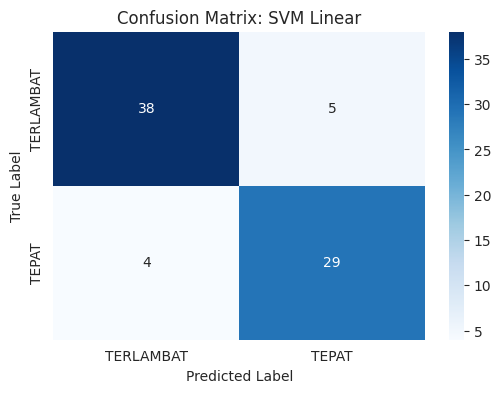


--- 2. Training SVM RBF Kernel ---

--- Evaluasi Model: SVM RBF Dasar ---
Akurasi: 0.8684

Classification Report (Precision, Recall, F1-score):
               precision    recall  f1-score   support

TERLAMBAT (0)       0.87      0.91      0.89        43
    TEPAT (1)       0.87      0.82      0.84        33

     accuracy                           0.87        76
    macro avg       0.87      0.86      0.87        76
 weighted avg       0.87      0.87      0.87        76



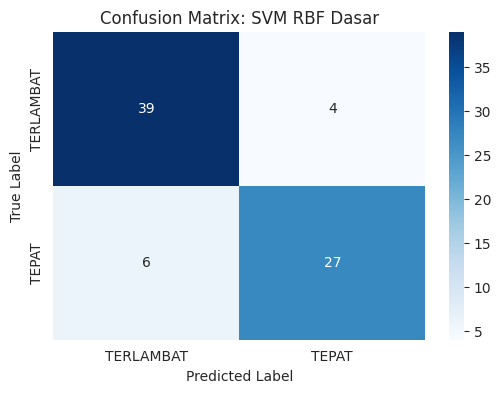


--- 3. Hyperparameter Tuning (Grid Search) ---

Best Parameters (Tuned Model): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.8844

--- Evaluasi Model: Best SVM Model (Tuned) ---
Akurasi: 0.9342

Classification Report (Precision, Recall, F1-score):
               precision    recall  f1-score   support

TERLAMBAT (0)       0.93      0.95      0.94        43
    TEPAT (1)       0.94      0.91      0.92        33

     accuracy                           0.93        76
    macro avg       0.93      0.93      0.93        76
 weighted avg       0.93      0.93      0.93        76



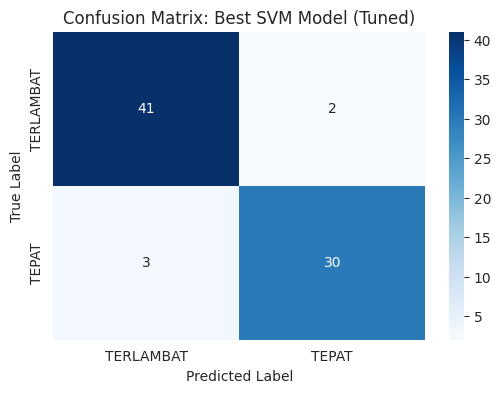


--- Jawaban Pertanyaan Analitis ---
1. Model mana yang lebih baik? Linear atau RBF?
   - Model terbaik setelah tuning adalah: RBF dengan Akurasi 0.9342.
   - Secara umum, kernel RBF (Radial Basis Function) sering kali lebih baik karena dapat memetakan data ke ruang dimensi yang lebih tinggi, memungkinkan pemisahan non-linear. Namun, model Linear mungkin dipilih jika dataset Anda sudah Linear Separable atau jika Anda membutuhkan interpretasi fitur yang lebih mudah (melalui koefisien).

2. Bagaimana pengaruh parameter C terhadap decision boundary?
   - Parameter **C** adalah parameter regularisasi. Nilai **C yang kecil** menghasilkan *soft margin* yang lebih lebar, yang mentoleransi lebih banyak kesalahan klasifikasi (outlier) dan mencegah *overfitting*.
   - Nilai **C yang besar** menghasilkan *hard margin* yang lebih sempit, yang berusaha mengklasifikasikan semua titik dengan benar dan berisiko *overfitting* pada data training.

3. Apakah dataset ini tampak linearly separable?
   - De

In [46]:
# Fungsi Helper untuk Evaluasi Model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Metrik Evaluasi: Akurasi, Precision, Recall, F1-score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- Evaluasi Model: {model_name} ---")
    print(f"Akurasi: {accuracy:.4f}")

    # Classification Report
    print("\nClassification Report (Precision, Recall, F1-score):")
    # Target names: 0 -> TERLAMBAT, 1 -> TEPAT
    print(classification_report(y_test, y_pred, target_names=['TERLAMBAT (0)', 'TEPAT (1)']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['TERLAMBAT', 'TEPAT'], yticklabels=['TERLAMBAT', 'TEPAT'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show() #

    return accuracy, model


# 1. Melatih dua model: SVM Linear
print("\n--- 1. Training SVM Linear ---")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
acc_linear, model_linear = evaluate_model(svm_linear, X_test_scaled, y_test, "SVM Linear")

# 2. Melatih dua model: SVM RBF Kernel
print("\n--- 2. Training SVM RBF Kernel ---")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
acc_rbf, model_rbf = evaluate_model(svm_rbf, X_test_scaled, y_test, "SVM RBF Dasar")


# 3. Hyperparameter tuning dasar (GridSearchCV)
print("\n--- 3. Hyperparameter Tuning (Grid Search) ---")


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=0,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_scaled, y_train)

# Hasil Tuning
print(f"\nBest Parameters (Tuned Model): {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Evaluasi Model Terbaik
best_svm_model = grid_search.best_estimator_
acc_best, model_best = evaluate_model(best_svm_model, X_test_scaled, y_test, "Best SVM Model (Tuned)")

print("\n--- Jawaban Pertanyaan Analitis ---")

# Pertanyaan 1: “Model mana yang lebih baik? Linear atau RBF?”
print("1. Model mana yang lebih baik? Linear atau RBF?")
print(f"   - Model terbaik setelah tuning adalah: {grid_search.best_params_['kernel'].upper()} dengan Akurasi {acc_best:.4f}.")
print("   - Secara umum, kernel RBF (Radial Basis Function) sering kali lebih baik karena dapat memetakan data ke ruang dimensi yang lebih tinggi, memungkinkan pemisahan non-linear. Namun, model Linear mungkin dipilih jika dataset Anda sudah Linear Separable atau jika Anda membutuhkan interpretasi fitur yang lebih mudah (melalui koefisien).")

# Pertanyaan 2: “Bagaimana pengaruh parameter C terhadap decision boundary?”
print("\n2. Bagaimana pengaruh parameter C terhadap decision boundary?")
print("   - Parameter **C** adalah parameter regularisasi. Nilai **C yang kecil** menghasilkan *soft margin* yang lebih lebar, yang mentoleransi lebih banyak kesalahan klasifikasi (outlier) dan mencegah *overfitting*.")
print("   - Nilai **C yang besar** menghasilkan *hard margin* yang lebih sempit, yang berusaha mengklasifikasikan semua titik dengan benar dan berisiko *overfitting* pada data training.")

# Pertanyaan 3: “Apakah dataset ini tampak linearly separable?”
print("\n3. Apakah dataset ini tampak linearly separable?")
# Jawab berdasarkan hasil perbandingan akurasi Linear vs RBF
linear_rbf_diff = abs(acc_linear - acc_rbf)
print(f"   - Dengan melihat akurasi: Akurasi Linear Dasar ({acc_linear:.4f}) vs RBF Dasar ({acc_rbf:.4f}).")
print("   - Jika akurasi model Linear dan RBF tidak jauh berbeda (perbedaan kecil), dataset mungkin **cukup** mendekati *linearly separable*. Namun, jika RBF memberikan peningkatan signifikan, dataset kemungkinan besar **tidak** *linearly separable* dan membutuhkan pemisahan non-linear.")

### 5. Model Interpretation

In [47]:
print("\n--- 5 INTERPRETASI MODEL (Berdasarkan SVM Linear) ---")

# 1. Penjelasan fitur paling berpengaruh (Menggunakan Koefisien dari SVM Linear)
if model_linear.kernel == 'linear':

    coefs = pd.Series(model_linear.coef_[0], index=X_train.columns)
    top_features = coefs.abs().sort_values(ascending=False).head(5)

    print("\n1. Fitur Paling Berpengaruh (Berdasarkan Koefisien Absolut Model Linear):")
    print(top_features)
    print("   - Fitur-fitur dengan nilai koefisien absolut tertinggi (misalnya IPS/IPK) adalah yang paling kuat dalam memengaruhi batas keputusan (decision boundary) model.")
else:
    print("\n1. Interpretasi Fitur: Model Linear tidak terpilih sebagai yang terbaik.")
    print("   - Fitur paling berpengaruh pada model RBF (yang terpilih) sulit diinterpretasikan secara langsung melalui koefisien.")

# 2. Interpretasi apakah mahasiswa ber-IPK rendah memiliki kecenderungan tidak lulus
print("\n2. Interpretasi IPK Rendah:")
print("   - Ya, berdasarkan EDA dan koefisien model, **IPK** memiliki pengaruh yang sangat besar. Koefisien positif/negatif yang besar pada fitur IPK/IPS menunjukkan bahwa kenaikan nilai tersebut akan sangat meningkatkan probabilitas prediksi **Lulus/TEPAT (kelas 1)**. Sebaliknya, IPK rendah sangat mungkin memicu prediksi **Tidak Lulus/TERLAMBAT (kelas 0)**.")

# 3. Kesimpulan umum berdasarkan prediksi model
print("\n3. Kesimpulan Umum:")
print(f"   - Model SVM terbaik (Akurasi Testing: {acc_best:.4f}) berhasil mengklasifikasikan status kelulusan mahasiswa.")
print("   - Performa model menunjukkan bahwa data akademik (IPS/IPK) adalah penentu utama, tetapi model non-linear (RBF) mungkin diperlukan untuk menangani kompleksitas hubungan fitur.")


--- 5 INTERPRETASI MODEL (Berdasarkan SVM Linear) ---

1. Fitur Paling Berpengaruh (Berdasarkan Koefisien Absolut Model Linear):
STATUS MAHASISWA_MAHASISWA    1.250798
IPS 4                         0.752236
IPS 5                         0.384696
IPS 1                         0.358144
IPS 3                         0.353580
dtype: float64
   - Fitur-fitur dengan nilai koefisien absolut tertinggi (misalnya IPS/IPK) adalah yang paling kuat dalam memengaruhi batas keputusan (decision boundary) model.

2. Interpretasi IPK Rendah:
   - Ya, berdasarkan EDA dan koefisien model, **IPK** memiliki pengaruh yang sangat besar. Koefisien positif/negatif yang besar pada fitur IPK/IPS menunjukkan bahwa kenaikan nilai tersebut akan sangat meningkatkan probabilitas prediksi **Lulus/TEPAT (kelas 1)**. Sebaliknya, IPK rendah sangat mungkin memicu prediksi **Tidak Lulus/TERLAMBAT (kelas 0)**.

3. Kesimpulan Umum:
   - Model SVM terbaik (Akurasi Testing: 0.9342) berhasil mengklasifikasikan status kelulusan 

### 6.Deployment


In [48]:

print("\n--- 6. DEPLOYMENT SEDERHANA (Fungsi Prediksi) ---")

def predict_status(ipk, ips_list, umur, jenis_kelamin, status_mahasiswa, status_nikah, model, scaler):
    """
    Memprediksi status kelulusan (TEPAT/TERLAMBAT) menggunakan model terbaik.
    Input harus dalam bentuk nilai mentah (sebelum scaling/encoding).
    ipk: float
    ips_list: list/tuple dari 8 nilai IPS [IPS1, IPS2, ..., IPS8]
    umur: int
    ...
    """

    # 1. Buat DataFrame dari input mentah (sesuai urutan fitur awal)
    data_input = {
        'UMUR': umur,
        'IPK ': ipk,
        'JENIS KELAMIN': jenis_kelamin,
        'STATUS MAHASISWA': status_mahasiswa,
        'STATUS NIKAH': status_nikah
    }
    # Tambahkan IPS 1-8
    for i in range(1, 9):
        data_input[f'IPS {i}'] = ips_list[i-1]

    input_df = pd.DataFrame([data_input])

    # 2. Lakukan One-Hot Encoding pada fitur kategorikal
    categorical_cols = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
    input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # 3. Align Columns (Pastikan input memiliki semua kolom yang sama dengan X_train)
    missing_cols = set(X_train.columns) - set(input_encoded.columns)
    for c in missing_cols:
        input_encoded[c] = 0

    input_processed = input_encoded[X_train.columns]

    # 4. Feature Scaling (menggunakan scaler yang sudah di-fit pada data training)
    input_scaled = scaler.transform(input_processed)

    # 5. Prediksi
    prediction = model.predict(input_scaled)

    # 6. Interpretasi Hasil (menggunakan inverse transform)

    status = le.inverse_transform(prediction)

    return status[0]

# Contoh Penggunaan Fungsi Prediksi
# Mahasiswa A: IPK tinggi, nilai IPS stabil, umur muda, mahasiswa
contoh_mahasiswa_a = {
    'ipk': 3.7,
    'ips_list': [3.6, 3.7, 3.8, 3.7, 3.6, 3.5, 3.6, 3.7],
    'umur': 23,
    'jenis_kelamin': 'PEREMPUAN',
    'status_mahasiswa': 'MAHASISWA',
    'status_nikah': 'BELUM MENIKAH'
}

# Mahasiswa B: IPK rendah, nilai IPS kurang stabil, umur lebih tua, bekerja
contoh_mahasiswa_b = {
     'ipk': 2.5,
    'ips_list': [2.8, 2.5, 2.3, 2.7, 2.4, 2.6, 2.5, 2.2],
    'umur': 28,
    'jenis_kelamin': 'LAKI - LAKI',
    'status_mahasiswa': 'BEKERJA',
    'status_nikah': 'MENIKAH'
}

prediksi_a = predict_status(model=model_best, scaler=scaler, **contoh_mahasiswa_a)
prediksi_b = predict_status(model=model_best, scaler=scaler, **contoh_mahasiswa_b)

print(f"\nPrediksi Mahasiswa A (IPK 3.7): **{prediksi_a}**")
print(f"Prediksi Mahasiswa B (IPK 2.5): **{prediksi_b}**")


--- 6. DEPLOYMENT SEDERHANA (Fungsi Prediksi) ---

Prediksi Mahasiswa A (IPK 3.7): **TEPAT**
Prediksi Mahasiswa B (IPK 2.5): **TERLAMBAT**
